<a href="https://colab.research.google.com/github/FelixEbenezer/ML_Reconnaissance_Texte_OCR/blob/main/ML_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. OCR COM TESSERACT

In [ ]:
En rappelant que OCR est la technique de détection de texte sur une image.
Et TESSRACT est juste une de ces methodes pour le faire et est le plus utilisé et est basé sur les reseaux de neurones artificiels.
PIPELINE de n importe quelle technique OCR:

Image input (Api Request) --> Pre processor --> Tesseract ocr engine --> Post precessor --> Text (Api response)

In [ ]:
LE tesseract a une fonction qui permet de detecter l orientation du texte sur l image, ainsi que l alphabet dans lequel le texte est écrit
Cette option est appelée OSD (Orientation and script detection).
Et il faudra detecter aussi si l image pourrait être roté, si oui, y appliquer un certain type de pretraitement 

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

In [2]:
import pytesseract
import numpy as np
import cv2 # OpenCV pour le traitment d images 
from google.colab.patches import cv2_imshow

In [ ]:
!pip install --ignore-installed Pillow==9.0.0


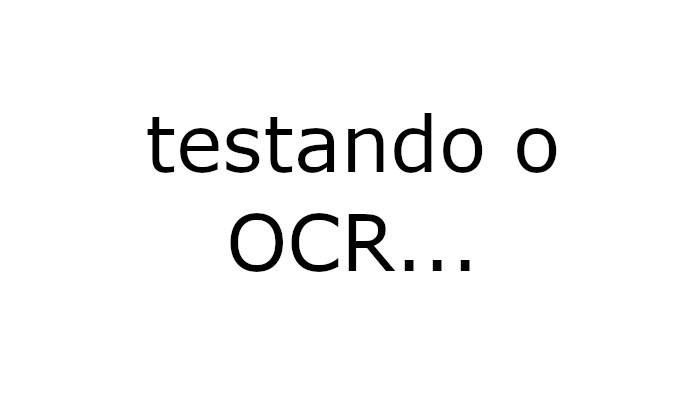

In [4]:
#LECTURE D UNE IMAGE
img = cv2.imread('/content/teste01.jpg')
cv2_imshow(img) # BGR (RGB)

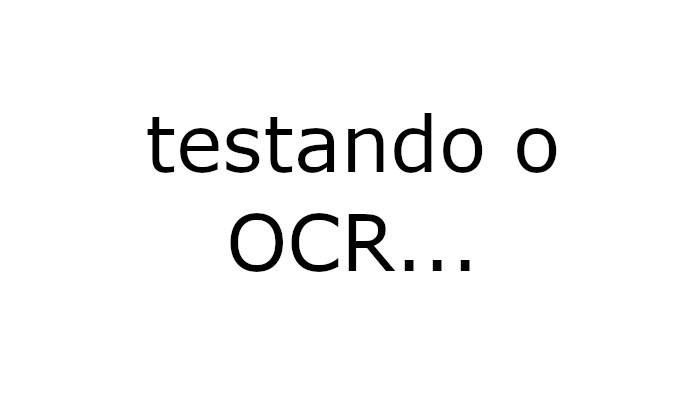

In [4]:
#PAr defaut l image d en haut est au format BRG, on doit le convertir en RGB pour mieux le traiter
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [5]:
#Recuperer et extraire le texte de l image
texto = pytesseract.image_to_string(rgb)

In [6]:
print(texto)

testando o
OCR...



In [ ]:
#SUPPORT DE CARACTERES ET SYMBOLES DES AUTRES LANGUES

In [5]:
#Pour voir les langues supportées par defaut par tesseract: on a donc l anglais et osd qui prend en charge d autres langues 
!tesseract --list-langs

List of available languages (2):
eng
osd


In [ ]:
#pour installer les langues:
!apt-get install tesseract-ocr-por

In [ ]:
!apt-get install tesseract-ocr-fra  #FRA for french, SPA for spain, DEU for german

In [11]:
!tesseract --list-langs

List of available languages (4):
fra
eng
osd
por


In [12]:
img = cv2.imread('teste02.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
texto = pytesseract.image_to_string(rgb, lang='por')
print(texto)

inteligência
artificial e visão
computacional



In [14]:
#AUTRES FACONS D INSTALLER LE SUPPORT A D AUTRES IDIOMES POUR DES DOCUMENTS PLUS COMPLEXES
#on crée d aboord le repertoir dans lequel seront installés ces supports
!mkdir tessdata

In [ ]:
#On installe les supports des idiomes le recuperant directement de leurs liens vers le repertoire créé testedata
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true  #Pour le portugais

In [ ]:
!wget -O ./tessdata/fra.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/fra.traineddata?raw=true #pour le francais 
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true #pour l anglais

In [17]:
#Maintenant on voit comment reconnaitre le texte avec cette nouvelle methode
config_tesseract = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

inteligência
artificial e visão
computacional



In [18]:
#Pour voir aussi les idiomes telechargés dans notre repertoire
!ls tessdata/

eng.traineddata  fra.traineddata  por.traineddata


## Parâmetros

### Page segmentation modes (PSM)

In [ ]:
#MODE DA SEGMENTATION DE LA PAGE (MSP)
#Ça permet de definir comment ocr doit voir notre document, comme une ligne, comme un block, pour voir ces differentes formes on fait:

In [19]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR.
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


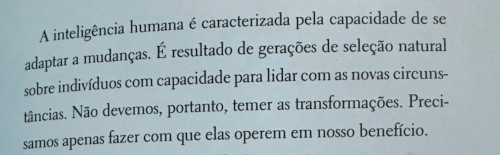

In [22]:
#EXEMPLE
img = cv2.imread('trecho-livro.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [23]:
#On va appliquer psm 6 (Assume a single uniform block of text.)
config_tesseract = '--tessdata-dir tessdata --psm 6'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

A inteligência humana é caracterizada pela capacidade de se
adaptar a mudanças. É resultado de gerações de seleção natural
Sobre indivíduos com capacidade para lidar com as novas ciruns-
tâncias. Não devemos, portanto, temer as transformações. Preci-
samos apenas fazer com que elas operem em nosso benefício.



In [ ]:
#Donc on est censé savoir les differentes formes de psm pour mieux extriare le texrte de nos documents, regarde ce qui donne si on ne met pas le psm ou 
#une autre forme diferrente de 6 pour le meme document

In [24]:
#Sans psm
config_tesseract = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

A inteligência humana é caracterizada pela capacidade de se
adaptar a mudanças. É resultado de gerações de seleção natural
Sobre indivíduos com capacidade para lidar com as novas ciruns-
portanto, temer as transformações. Preci-

tâncias. Não devemos,
samos apenas fazer com que elas operem em nosso benefício.



In [25]:
#Avec une autre forme de psm 7 par exemple
config_tesseract = '--tessdata-dir tessdata --psm 7'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

ªâªªââ%%ã%ãâêâã%%?ª%%ã



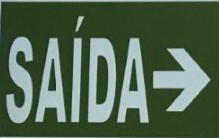

In [26]:
#Les memes approches mais pour une autre image:
img = cv2.imread('saida.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [27]:
config_tesseract = '--tessdata-dir tessdata --psm 7'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

SAÍDA>



In [28]:
config_tesseract = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

SAÍDA>



In [29]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

SAÍDA>



### Detecção de orientação da página

In [30]:
from PIL import Image
import matplotlib.pyplot as plt

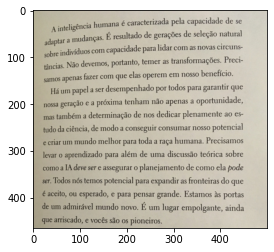

In [31]:
img = Image.open('livro01.jpg') #une autre facon de lire une image, avec PIL et pas CV2, avantage, pas besoin de convertit l image en RGB car elle est deja chargée en ce format
plt.imshow(img);

In [32]:
#pour voir les differentes caracteristiques de l image
print(pytesseract.image_to_osd(img))

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 1.66
Script: Latin
Script confidence: 13.33



# Seleção dos textos



In [33]:
from pytesseract import Output

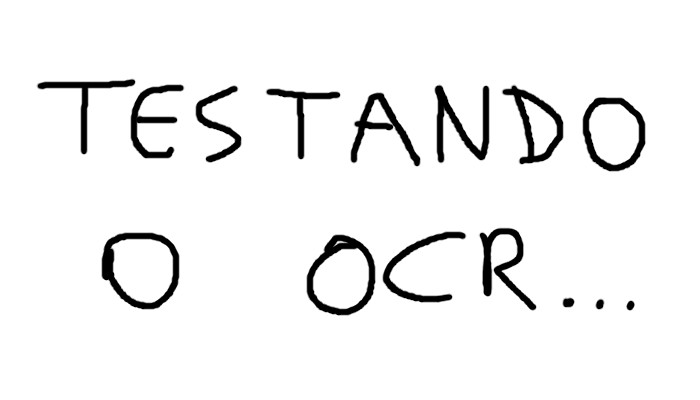

In [34]:
img = cv2.imread('/content/teste_manuscrito_01.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

- block_num = Número do bloco atual. Quando o tesseract faz o OCR, ele divide a imagem em várias regiões, o que pode variar de acordo com os parametros do PSM e também outros critérios próprios do algoritmo. Cada bloco é uma região

- conf = confiança da predição (de 0 a 100. -1 significa que não foi reconhecido texto)

- height = altura do bloco de texto detectada (ou seja, da caixa delimitadora)

- left = coordenada x onde inicia a caixa delimitadora

- level = o level (nível) corresponde à categoria do bloco detectado. são 5 valores possiveis:
  1. página
  2. bloco
  3. parágrafo
  4. linha
  5. palavra

Portanto, se foi retornado o valor 5 significa que o bloco detectado é texto, se foi 4 significa que o que foi detectado é uma linha

- line_num = número da linha do que foi detectado (inicia com 0)

- page_num = o índice da página onde o item foi detectado. Na maioria dos casos sempre haverá uma página só

- text = o resultado do reconhecimento

- top = coordenada y onde a caixa delimitadora começa

- width = largura do bloco de texto atual detectado

- word_num = numero da palavra (indice) dentro do bloco atual

In [35]:
config_tesseract = '--tessdata-dir tessdata'
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang='por', output_type=Output.DICT)
resultado

{'block_num': [0, 1, 1, 1, 1, 1, 1, 1],
 'conf': ['-1', '-1', '-1', '-1', 90, '-1', 74, 66],
 'height': [400, 236, 236, 92, 92, 87, 76, 87],
 'left': [0, 38, 38, 38, 38, 102, 102, 307],
 'level': [1, 2, 3, 4, 5, 4, 5, 5],
 'line_num': [0, 0, 0, 1, 1, 2, 2, 2],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1],
 'text': ['', '', '', '', 'TESTANDO', '', 'O', 'OCR...'],
 'top': [0, 79, 79, 79, 79, 228, 233, 228],
 'width': [700, 607, 607, 607, 607, 532, 77, 327],
 'word_num': [0, 0, 0, 0, 1, 0, 1, 2]}

In [36]:
min_conf = 40 #@param {type: 'slider', min: 0, max: 100}

In [ ]:
#on ecrit une fonction pour encadrer chaque texte du document dans un rectangle

In [37]:
def caixa_texto(resultado, img, cor = (255, 100, 0)):
  x = resultado['left'][i]
  y = resultado['top'][i]
  w = resultado['width'][i]
  h = resultado['height'][i]

  cv2.rectangle(img, (x, y), (x + w, y + h), cor, 2)

  return x, y, img

In [38]:
len(resultado['text'])

8

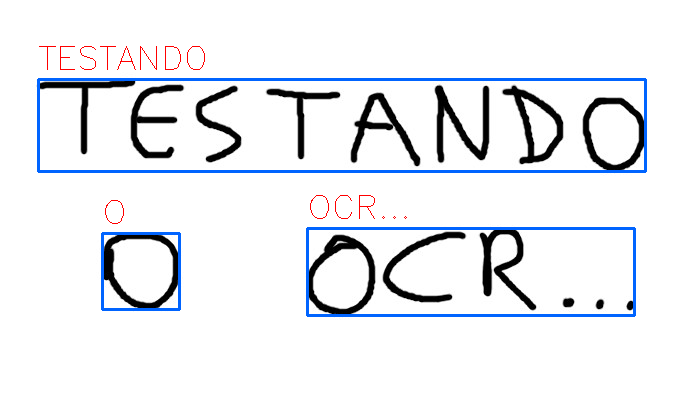

In [39]:
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  #print(i)
  confianca = int(resultado['conf'][i])
  #print(confianca)
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)
    #print(x, y)
    texto = resultado['text'][i]
    cv2.putText(img_copia, texto, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255))
cv2_imshow(img_copia)

In [40]:
img = cv2.imread('teste02.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [41]:
config_tesseract = "--tessdata-dir tessdata"
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang="por", output_type=Output.DICT)
resultado

{'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'conf': ['-1', '-1', '-1', '-1', 91, '-1', 88, 93, 91, '-1', 91],
 'height': [400, 222, 222, 62, 62, 50, 48, 36, 50, 59, 59],
 'left': [0, 111, 111, 182, 182, 111, 111, 380, 437, 130, 130],
 'level': [1, 2, 3, 4, 5, 4, 5, 5, 5, 4, 5],
 'line_num': [0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'text': ['',
  '',
  '',
  '',
  'inteligência',
  '',
  'artificial',
  'e',
  'visão',
  '',
  'computacional'],
 'top': [0, 84, 84, 84, 84, 165, 167, 179, 165, 247, 247],
 'width': [700, 481, 481, 341, 341, 481, 237, 30, 155, 440, 440],
 'word_num': [0, 0, 0, 0, 1, 0, 1, 2, 3, 0, 1]}

In [42]:
from PIL import ImageFont, ImageDraw, Image
fonte = '/content/calibri.ttf'

In [43]:
def escreve_texto(texto, x, y, img, fonte, tamanho_texto=32):
  fonte = ImageFont.truetype(fonte, tamanho_texto)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y - tamanho_texto), texto, font = fonte)
  img = np.array(img_pil)
  return img

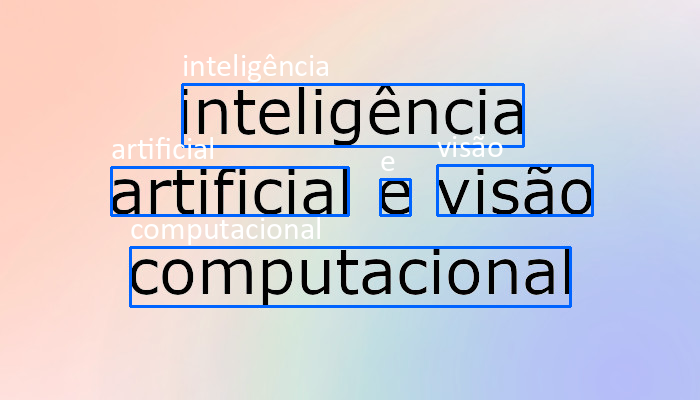

In [44]:
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)
    texto = resultado['text'][i]
    #cv2.putText(img_copia, texto, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255))
    img_copia = escreve_texto(texto, x, y, img_copia, fonte)
cv2_imshow(img_copia)

# Buscando informações específicas na imagem 

In [45]:
import re # regular expressions

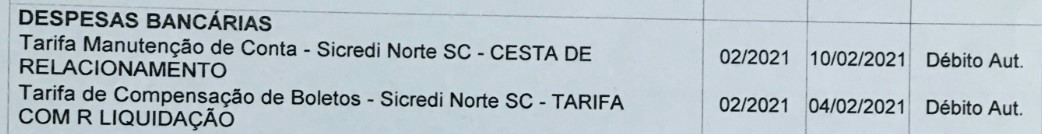

In [46]:
img = cv2.imread("tabela_teste.jpg")
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [47]:
config_tesseract = "--tessdata-dir tessdata"
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang="por", output_type=Output.DICT)
resultado

{'block_num': [0,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3],
 'conf': ['-1',
  '-1',
  '-1',
  '-1',
  92,
  92,
  '-1',
  '-1',
  '-1',
  92,
  91,
  91,
  92,
  93,
  92,
  92,
  93,
  94,
  92,
  92,
  91,
  87,
  87,
  87,
  '-1',
  90,
  '-1',
  92,
  92,
  92,
  93,
  92,
  93,
  92,
  91,
  93,
  96,
  92,
  87,
  87,
  77,
  84,
  '-1',
  '-1',
  '-1',
  90,
  93,
  91],
 'height': [134,
  22,
  22,
  22,
  19,
  21,
  82,
  82,
  34,
  17,
  22,
  16,
  16,
  2,
  17,
  16,
  15,
  2,
  16,
  15,
  16,
  15,
  16,
  15,
  20,
  20,
  32,
  17,
  16,
  21,
  16,
  16,
  3,
  16,
  16,
  16,
  2,
  16,
  15,
  16,
  15,
  15,
  23,
  23,
  23,
  16,
  16,
  23],
 'left': [0,
  19,
  19,
  19,
  19,
  147,
  19,
  19,
  19,
  19,
  84,
  211,
  241,
  304,
  318,
  388,
  444,
  478,
  491,

In [48]:
# https://regexr.com/
padrao_data = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

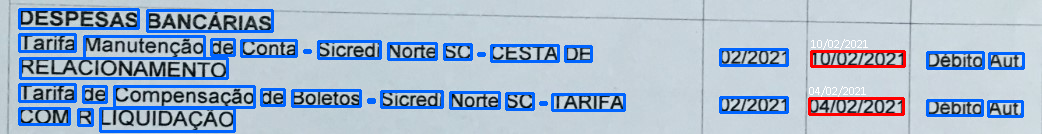

In [49]:
datas = []
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    texto = resultado['text'][i]
    if re.match(padrao_data, texto):
      x, y, img = caixa_texto(resultado, img_copia, (0,0,255))
      img_copia = escreve_texto(texto, x, y, img_copia, fonte, 12)
      datas.append(texto)
    else:
      x, y, img_copia = caixa_texto(resultado, img_copia)
cv2_imshow(img_copia)

In [50]:
datas

['10/02/2021', '04/02/2021']

# Detecção de texto em cenários naturais

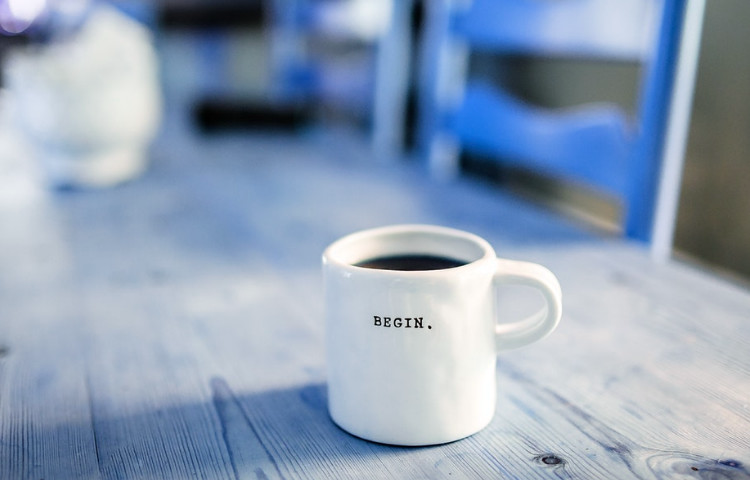

In [51]:
img = cv2.imread("caneca.jpg")
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [52]:
resultado = pytesseract.image_to_data(rgb, lang="por", output_type=Output.DICT)
resultado

{'block_num': [0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3],
 'conf': ['-1',
  '-1',
  '-1',
  '-1',
  95,
  '-1',
  '-1',
  '-1',
  93,
  '-1',
  '-1',
  '-1',
  95],
 'height': [480, 295, 295, 295, 295, 13, 13, 13, 13, 71, 71, 71, 71],
 'left': [0, 668, 668, 668, 668, 374, 374, 374, 374, 0, 0, 0, 0],
 'level': [1, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5],
 'line_num': [0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
 'text': ['', '', '', '', ' ', '', '', '', 'BEGIN.', '', '', '', ''],
 'top': [0, 0, 0, 0, 0, 316, 316, 316, 316, 409, 409, 409, 409],
 'width': [750, 82, 82, 82, 82, 58, 58, 58, 58, 169, 169, 169, 169],
 'word_num': [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1]}

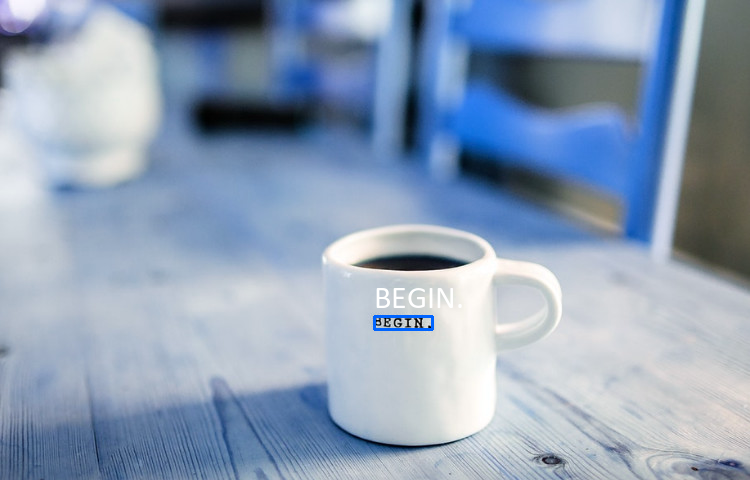

In [53]:
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    texto = resultado['text'][i]
    if not texto.isspace() and len(texto) > 0:
      x, y, img = caixa_texto(resultado, img_copia)
      img_copia = escreve_texto(texto, x, y, img_copia, fonte)
cv2_imshow(img_copia)

In [54]:
resultado['conf']

['-1', '-1', '-1', '-1', 95, '-1', '-1', '-1', 93, '-1', '-1', '-1', 95]

In [55]:
resultado['text']

['', '', '', '', ' ', '', '', '', 'BEGIN.', '', '', '', '']